In [2]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: no se puede crear el directorio «build»: El archivo ya existe
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /usr/bin/python (found version "3.8.2") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/fede2004/workspace/tp3-metnum
-- Configuring done
-- Generating done
-

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt

# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/home/fede2004/workspace/tp3-metnum/notebooks
Python 3.8.2


In [4]:
df = pd.read_csv('../data/train.csv')
df = df[df['ciudad']=='Mérida'].dropna()

X = df['habitaciones'].values
y = df['precio'].values

X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

In [5]:
X.shape

(518, 1)

In [6]:
from sklearn.linear_model import LinearRegression

"""
Reemplazar por nuestra implementación 
"""

# linear_regressor = LinearRegression()
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y)



In [7]:
df['prediction'] = linear_regressor.predict(X)

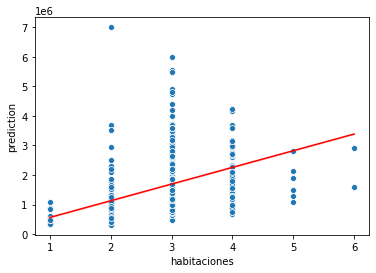

In [8]:
sns.scatterplot(data=df, x='habitaciones', y='precio')
sns.lineplot(data=df, x='habitaciones', y='prediction', color='red')

In [9]:
X2 = df[['habitaciones','metroscubiertos']].values
X2 = X2.reshape(len(X),2)
y = y.reshape(len(y),1)


linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X2,y)
df['prediction'] = linear_regressor.predict(X2)

X2.shape

(518, 2)

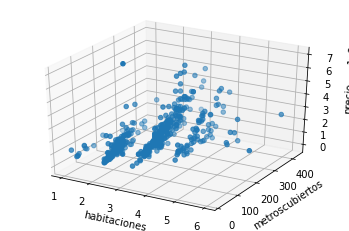

In [12]:
ax = plt.figure().gca(projection='3d')
ax.scatter(df['habitaciones'], df['metroscubiertos'], df['precio'])
ax.set_xlabel('habitaciones')
ax.set_ylabel('metroscubiertos')
ax.set_zlabel('precio')

a = df['habitaciones'].values
b = df['metroscubiertos'].values
c = df['prediction'].values
a = a.reshape(len(a),1)
b = b.reshape(len(b),1)
c = c.reshape(len(c),1)

a, b = np.meshgrid(a, b)

ax.plot_surface(a,b,c, color='red', rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# ax.view_init(120, 40)

plt.show()